<a href="https://colab.research.google.com/github/pawan-cpu/MACHINE-LEARNING-MODEL/blob/main/MATRIX_OPERATIONS__NasscomAIFC_Project_55_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions

---

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

 1. Multiple linear regression - Introduction
 
 

---

#### Getting Started:

1. Click on this link to open the Colab file for this project.

  https://colab.research.google.com/drive/1QWLHa-kuPkKBW5ZWAe4K70RFdJzYeg7q#scrollTo=azReToS7wWX3

2. Create a duplicate copy of the Colab file as described below.

  - Click on the **File menu**. A new drop-down list will appear.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/0_file_menu.png' width=500>

  - Click on the **Save a copy in Drive** option. A duplicate copy will get created. It will open up in the new tab on your web browser.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/1_create_colab_duplicate_copy.png' width=500>

3. After creating the duplicate copy of the notebook, please rename it in the **YYYY-MM-DD_StudentName_Project64** format.

4. Now, write your code in the prescribed code cells.


---

### Problem Statement

CO2 emissions are majorly responsible for global climate change. Excess CO2 emissions causes severe air pollution and many people suffer from respiratory disorders. Automobiles are a major source of CO2 emissions. Thus, it is important to measure the CO2 emission to maintain a healthy environment for all living beings on earth.

Implement multiple linear regression to create a predictive model capable of estimating CO2 emission of cars based on different data of the car models. Also, evaluate the accuracy of the prediction model.






---

### List of Activities

**Activity 1:** Analysing the Dataset

 
**Activity 2:** Train-Test Split

**Activity 3:**  Model Training

**Activity 4:** Model Prediction 

**Activity 5:** Model Evaluation







---


#### Activity 1:  Analysing the Dataset

- Create a Pandas DataFrame for **FuelConsumptionCO2** dataset using the below link. This dataset consists of data of 2014 cars such as engine size, number of cylinders, fuel consumption and CO2 emission.



  **Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/FuelConsumptionCo2.csv

- Print the first five rows of the dataset. Check for null values and treat them accordingly.





In [ ]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
# Load the dataset
df=pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/FuelConsumptionCo2.csv')
df
# Print first five rows using head() function
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,12.1,8.7,10.6,27,244


In [ ]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [ ]:
# Get the list of columns of the dataset.
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [ ]:
features = list(df.columns.values)
features.remove('CO2EMISSIONS')
features.remove('MODELYEAR')
features.remove('MAKE')
features.remove('MODEL')
features.remove('VEHICLECLASS')

features

['ENGINESIZE',
 'CYLINDERS',
 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY',
 'FUELCONSUMPTION_COMB',
 'FUELCONSUMPTION_COMB_MPG']

---

#### Activity 2: Train-Test Split

We need to predict the value of `CO2EMISSIONS` variable, given other variables. Thus, `CO2EMISSIONS` is the target variable and other columns except `CO2EMISSIONS` are the feature variables.

Split the dataset into training set and test set such that the training set contains 70% of the instances and the remaining instances will become the test set.

**Note:** Do not consider the columns such as `MODELYEAR`, `MAKE`, `MODEL`, `VEHICLECLASS` as feature variables since they are not much significant in this analysis.

In [ ]:
# Split the DataFrame into the training and test sets.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[features]
y = df['CO2EMISSIONS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42) 

---

#### Activity 3: Model Training

Implement multiple linear regression using `sklearn` module by creating an object of the `LinearRegression` class and calling the `fit()` function.

**Note:** Reshaping the target variable array into a 2D array is not mandatory in multiple linear regression. You can skip that.

In [ ]:
# Build linear regression model
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

# Build a linear regression model using the 'sklearn.linear_model' module.
sklearn_lin_reg = LinearRegression()
sklearn_lin_reg.fit(X_train, y_train_reshaped)

# Print the value of the intercept i.e. beta-sub-0.
print("\nConstant".ljust(15, " "), f"{sklearn_lin_reg.intercept_[0]:.6f}") # Soon you will get to know why rounding-off to 6 decimal places.

# Print the names of the features along with the values of their corresponding coefficients.
for item in list(zip(X.columns.values, sklearn_lin_reg.coef_[0])):
  print(f"{item[0]}".ljust(15, " "), f"{item[1]:.6f}") # Soon you will get to know why rounding-off to 6 decimal places.


# Print the value of the intercept 


# Print the names of the features along with the values of their corresponding coefficients.



Constant       256.996113
ENGINESIZE      9.384089
CYLINDERS       6.724061
FUELCONSUMPTION_CITY -14.730791
FUELCONSUMPTION_HWY -6.960195
FUELCONSUMPTION_COMB 25.410125
FUELCONSUMPTION_COMB_MPG -3.909737


---

#### Activity 4: Model Prediction using Test Set

Predict the values for the test set by calling the `predict()` function on the LinearRegression object. 



In [ ]:
# Predict the target variable values for test set
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_train_pred = sklearn_lin_reg.predict(X_train)
y_test_pred = sklearn_lin_reg.predict(X_test)


---

#### Activity 5: Model Evaluation

Calculate the $R^2$, MSE, RMSE and MAE values for the test set to evaluate the accuracy of your model. Also, perform residual analysis to check if the error terms are normally distributed for the test set.

In [ ]:
# Evaluate the model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module for the test set.
print(f"\n\nTest Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_test_reshaped, y_test_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_reshaped, y_test_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test_reshaped, y_test_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_reshaped, y_test_pred):.3f}")



Test Set
--------------------------------------------------
R-squared: 0.903
Mean Squared Error: 390.210
Root Mean Squared Error: 19.754
Mean Absolute Error: 12.841


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


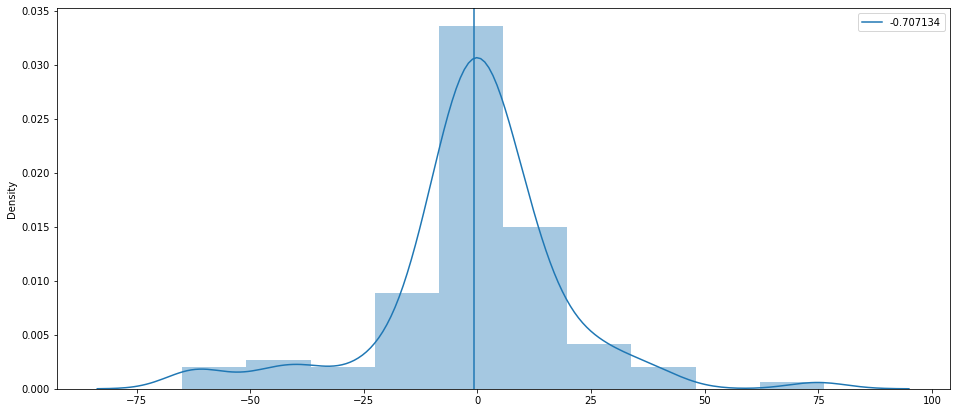

In [ ]:
# Create a histogram for the errors obtained in the predicted values for the test set
errors_test=y_test_reshaped-y_test_pred
plt.figure(figsize=(16,7))
sns.distplot(errors_test,bins='sturges')
plt.axvline(errors_test.mean(),label=f'{errors_test.mean():3f}')
plt.legend()
plt.show()

**Q:** What is the mean of errors for the test test? Is it zero?

**A:** 


---

### Submitting the Project:

1. After finishing the project, click on the **Share** button on the top right corner of the notebook. A new dialog box will appear.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/2_share_button.png' width=500>

2. In the dialog box, make sure that '**Anyone on the Internet with this link can view**' option is selected and then click on the **Copy link** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/3_copy_link.png' width=500>

3. The link of the duplicate copy (named as **YYYY-MM-DD_StudentName_Project64**) of the notebook will get copied 

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/4_copy_link_confirmation.png' width=500>

4. Go to your dashboard and click on the **My Projects** option.
   
   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/5_student_dashboard.png' width=800>

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/6_my_projects.png' width=800>

5. Click on the **View Project** button for the project you want to submit.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/7_view_project.png' width=800>

6. Click on the **Submit Project Here** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/8_submit_project.png' width=800>

7. Paste the link to the project file named as **YYYY-MM-DD_StudentName_Project64** in the URL box and then click on the **Submit** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/9_enter_project_url.png' width=800> 

---